In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
df = pd.read_csv(r"C:\Users\sujit\downloads\car data.csv")

# Exploratory Data Analysis

In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Univariate Analysis

<AxesSubplot:title={'center':'Transmission Type: Manual vs Automatic'}>

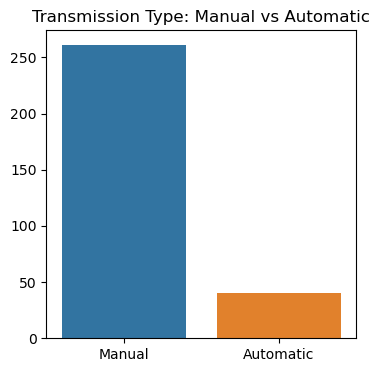

In [18]:
transmissioncount=df['Transmission'].value_counts()
plt.figure(figsize=(4,4))
plt.title("Transmission Type: Manual vs Automatic")

sns.barplot(x=transmissioncount.index, y= transmissioncount.values)

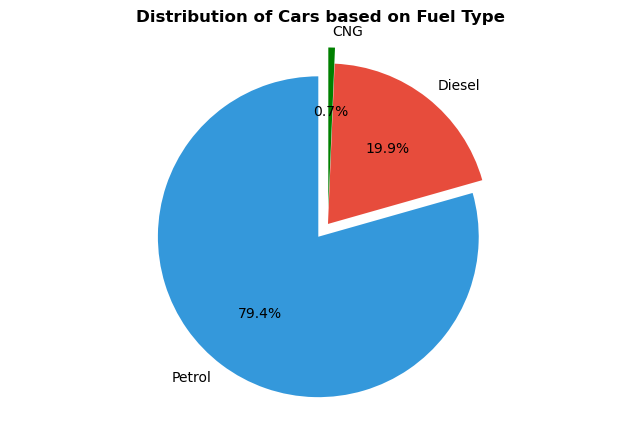

In [38]:
import matplotlib.pyplot as plt

# Example data
Fueltype_count = df['Fuel_Type'].value_counts()

# Colors for each category
colors = ['#3498db', '#e74c3c', 'green']

# Exploding a slice (optional)
explode = (0.1, 0,0.1)

# Plotting the pie chart
plt.figure(figsize=(8, 5))
plt.pie(Fueltype_count, labels=Fueltype_count.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title
plt.title('Distribution of Cars based on Fuel Type', fontweight="bold")

# Show the pie chart
plt.show()


In [74]:
top_5_Carsfrsale= df['Car_Name'].value_counts().nlargest(5)
top_5_Carsfrsale

city             26
corolla altis    16
verna            14
fortuner         11
brio             10
Name: Car_Name, dtype: int64

In [143]:
#Company with highest number of used cars to sale

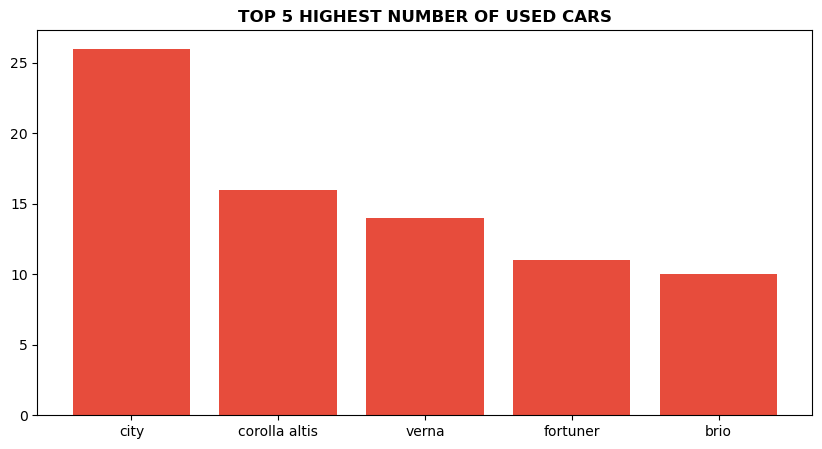

In [157]:


plt.figure(figsize=(10, 5))
colors = ['#e74c3c']

plt.title("TOP 5 HIGHEST NUMBER OF USED CARS", fontweight="bold")
plt.bar(top_5_Carsfrsale.index, top_5_Carsfrsale.values, color=colors)  # Use colors[0] for a consistent color

plt.show()


#### List of Cars having selling price greater than 20 lakhs and Driven kms less than 4000kms.

In [88]:

selected_cars = df[(df['Selling_Price'] > 20) & (df['Driven_kms']<40000) ]
selected_cars


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
64,fortuner,2017,33.00,36.23,6000,Diesel,Dealer,Automatic,0
82,innova,2017,23.00,25.39,15000,Diesel,Dealer,Automatic,0
96,innova,2016,20.75,25.39,29000,Diesel,Dealer,Automatic,0


In [89]:
list_of_cars= selected_cars[['Car_Name', 'Driven_kms']]
list_of_cars


,Car_Name,Driven_kms
64,fortuner,6000
82,innova,15000
96,innova,29000


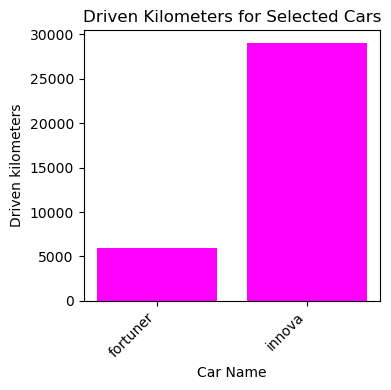

In [155]:
import matplotlib.pyplot as plt


plt.figure(figsize=(4, 4))
plt.bar(list_of_cars['Car_Name'], list_of_cars['Driven_kms'], color='magenta')
plt.xlabel('Car Name')
plt.ylabel('Driven kilometers')
plt.title('Driven Kilometers for Selected Cars')
plt.xticks(rotation=45, ha='right')  


plt.tight_layout()
plt.show()


#### Correlation matrix

In [106]:

numerical_columns = []

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        numerical_columns.append(column)

print("Numerical Columns:")
print(df[numerical_columns])


Numerical Columns:
     Year  Selling_Price  Present_Price  Driven_kms  Owner
0    2014           3.35           5.59       27000      0
1    2013           4.75           9.54       43000      0
2    2017           7.25           9.85        6900      0
3    2011           2.85           4.15        5200      0
4    2014           4.60           6.87       42450      0
..    ...            ...            ...         ...    ...
296  2016           9.50          11.60       33988      0
297  2015           4.00           5.90       60000      0
298  2009           3.35          11.00       87934      0
299  2017          11.50          12.50        9000      0
300  2016           5.30           5.90        5464      0

[301 rows x 5 columns]


In [109]:
correlation_matrix = df[numerical_columns].corr()
correlation_matrix

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


<AxesSubplot:>

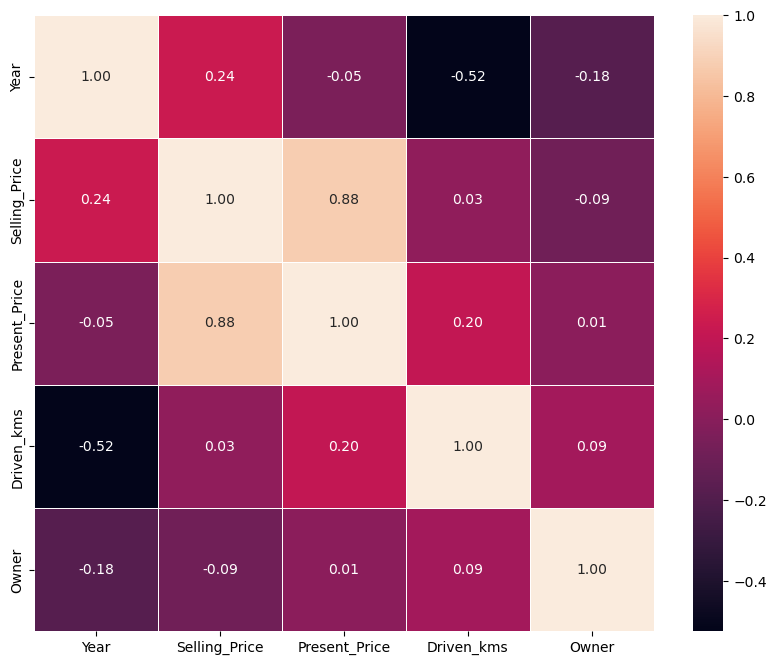

In [115]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)


## Label Encoding of Categorical Columns

In [130]:
#importing skicit libraries now
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [131]:
label_encoder= LabelEncoder()
df['Car_Name'] = label_encoder.fit_transform(df['Car_Name'])
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Selling_type'] = label_encoder.fit_transform(df['Selling_type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])

In [132]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


## Spliting the dataset into training and testing data

In [133]:
features = df.drop('Selling_Price', axis= 1)
target= df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Creating multiple Machine learning Models

In [151]:
#Decision Tree Regressor
model= DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

# Random Forest Regressor
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train, y_train)
randomforest_y_pred = random_forest_reg.predict(X_test)





In [ ]:
#For Decision Tree Regressor Model

In [152]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 0.6816393442622949


In [ ]:
#Mean absolute Error for Random Forest Model:

In [153]:

mae = mean_absolute_error(y_test, randomforest_y_pred)

print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.589304918032787


The MAE of Random forest is less than Decision Tree model which also shows that it is better as it is a combination of multiple decision trees


The MAE 0.58 shows here that the predicted value of Cars by ML model are off by 0.58 lakhs from the actual value which is quite good considering the range of data.